In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df =  pd.read_csv('cell_samples.csv')
df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


<Axes: xlabel='Clump', ylabel='UnifSize'>

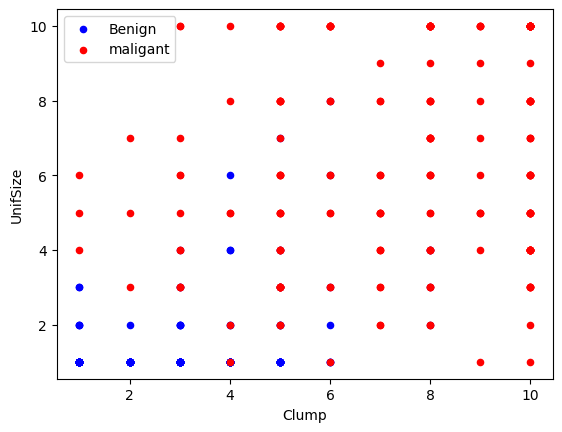

In [17]:
benign_df = df[df['Class']==2][0:200]
maligant_df = df[df['Class']==4][0:200]

axes = benign_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='Benign')

maligant_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='maligant', ax=axes)



In [21]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')

df.dtypes

C:\Users\wq\AppData\Local\Temp\ipykernel_13716\703161922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BareNuc'] = df['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [25]:
df.columns

feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

X = np.asarray(feature_df)
y = np.asarray(df['Class'])
y[:10]

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2], dtype=int64)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)

In [49]:
from sklearn.svm import SVC

model = SVC(kernel='linear', gamma='auto', C=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


# confusion matrix:
#                    predicted
#                 neg           pos
# actual   neg    TN            FP
#          pos    FN            TP


# precision:      TP/(TP+FP) = TP/(total predicted positive)
# recall:         TP/(TP+FN) = TP/(total actual positive)
# f1-score:       2 * (precision*recal) / (precision+recall)
# support:        How many instances in that class in test set

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

